In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [207]:
# Import the complete redfin dataset
# df = pd.read_csv("./redfin_2022_san_diego-all.csv")
df = pd.io.parsers.read_csv("./redfin_2022_san_diego-all.csv", dtype={'ZIP OR POSTAL CODE': 'str'})

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    300 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                300 non-null    object 
 3   ADDRESS                                                                                      297 non-null    object 
 4   CITY                                                                                         300 non-null    object 
 5   STATE OR PROVINCE                   

In [209]:
# Display the first 5 results to get a snapshot of the data and categories.
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,3330 Caminito Eastbluff #149,La Jolla,CA,92037,1150000,3.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/3330-Camini...,SDMLS,220022531,N,Y,32.858687,-117.231625
1,MLS Listing,NaN,Single Family Residential,5640 Dugan Ave,La Mesa,CA,91942,759000,3.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Mesa/5640-Dugan-A...,SDMLS,220021439,N,Y,32.780982,-117.020159
2,MLS Listing,NaN,Townhouse,3422 Via Alicante,La Jolla,CA,92037,829900,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/3422-Via-Al...,SDMLS,220020482,N,Y,32.861255,-117.231921
3,MLS Listing,NaN,Condo/Co-op,8437 Via Mallorca #85,La Jolla,CA,92037,875000,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/8437-Via-Ma...,SDMLS,220020168,N,Y,32.859532,-117.233455
4,MLS Listing,NaN,Single Family Residential,11393 Turtleback Ln,San Diego,CA,92127,1195000,4.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/CA/San-Diego/11393-Turt...,SDMLS,220019616,N,Y,33.009474,-117.083660


In [210]:
# Brief Data Snapshot before cleaning data
print("Sum of missing values: ", df.isnull().sum().sum())
print("Columns with NA: ", df.columns[df.isna().any()].tolist())
print("Show Missing Values:", df.isnull())
print("Missing Values Present:", df.isnull().values.any())

Sum of missing values:  1118
Columns with NA:  ['SOLD DATE', 'ADDRESS', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME']
Show Missing Values:      SALE TYPE  SOLD DATE  PROPERTY TYPE  ADDRESS   CITY  STATE OR PROVINCE  \
0        False       True          False    False  False              False   
1        False       True          False    False  False              False   
2        False       True          False    False  False              False   
3        False       True          False    False  False              False   
4        False       True          False    False  False              False   
..         ...        ...            ...      ...    ...                ...   
295      False       True          False    False  False              False   
296      False       True          False    False  False              False   
297      False       True       

In [211]:
# Drop the data columns that are not relevant and display the snapshot of the new dataframe
df_mod = df.drop(['SOLD DATE', 'ADDRESS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)

# Drop "Sale Type" of "New Construction Plan" due to significant missing data
new_const = df_mod[df_mod["SALE TYPE"] == "New Construction Plan"].index
df_mod.drop(new_const, inplace = True)

# Drop Town Homes which have a Lot Size of "0"
town_homes = df_mod[df_mod["PROPERTY TYPE"] == "Townhouse"].index
df_mod.drop(town_homes, inplace = True)

# Drop Rows where "Property Type" is "Vacant Land"
vacant_land = df_mod[df_mod['PROPERTY TYPE'] == 'Vacant Land'].index
df_mod.drop(vacant_land, inplace = True)

# Fill NA values of "HOA" with "0"
df_mod["HOA/MONTH"].fillna(0, inplace=True)

# Fill NA "Lot Size" with Mean Value
df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].mean(), inplace=True)
 
df_mod

,SALE TYPE,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS
0,MLS Listing,Condo/Co-op,La Jolla,CA,92037,1150000,3.0,2.5,La Jolla,1707.0,155945.000000,1978.0,13.0,674.0,495.0,Active
1,MLS Listing,Single Family Residential,La Mesa,CA,91942,759000,3.0,2.0,La Mesa,1018.0,6100.000000,1958.0,27.0,746.0,0.0,Active
3,MLS Listing,Condo/Co-op,La Jolla,CA,92037,875000,2.0,2.5,La Jolla,1074.0,103585.000000,1977.0,42.0,815.0,400.0,Active
4,MLS Listing,Single Family Residential,San Diego,CA,92127,1195000,4.0,3.0,Rancho Bernardo,2284.0,10259.000000,1981.0,48.0,523.0,107.0,Active
5,MLS Listing,Condo/Co-op,La Jolla,CA,92037,579000,1.0,1.0,La Jolla,504.0,98435.000000,1972.0,82.0,1149.0,300.0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,MLS Listing,Condo/Co-op,La Jolla,CA,92037,2500000,2.0,2.0,La Jolla,1676.0,49491.703297,2004.0,692.0,1492.0,624.0,Active
292,MLS Listing,Single Family Residential,La Jolla,CA,92037,3695000,3.0,2.0,La Jolla,1280.0,4107.000000,1944.0,982.0,2887.0,0.0,Active
293,For-Sale-by-Owner Listing,Condo/Co-op,San Diego,CA,92122,776000,2.0,2.0,La Jolla,934.0,49491.703297,1987.0,38.0,831.0,0.0,Active
294,New Construction Home,Single Family Residential,San Diego,CA,92127,1345900,4.0,3.5,Avion,2289.0,49491.703297,2022.0,21.0,588.0,0.0,Active


In [212]:
# Brief Data Snapshot after cleaning data
# print("Sum of missing values: ", df_mod.isnull().sum().sum())
# print("Columns with NA: ", df_mod.columns[df_mod.isna().any()].tolist())
# print("Show Missing Values:", df_mod.isnull())
print("Missing Values Present:", df_mod.isnull().values.any())

Missing Values Present: False


In [213]:
# Display the info and datatypes for the new dataframe
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 295
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SALE TYPE           262 non-null    object 
 1   PROPERTY TYPE       262 non-null    object 
 2   CITY                262 non-null    object 
 3   STATE OR PROVINCE   262 non-null    object 
 4   ZIP OR POSTAL CODE  262 non-null    object 
 5   PRICE               262 non-null    int64  
 6   BEDS                262 non-null    float64
 7   BATHS               262 non-null    float64
 8   LOCATION            262 non-null    object 
 9   SQUARE FEET         262 non-null    float64
 10  LOT SIZE            262 non-null    float64
 11  YEAR BUILT          262 non-null    float64
 12  DAYS ON MARKET      262 non-null    float64
 13  $/SQUARE FEET       262 non-null    float64
 14  HOA/MONTH           262 non-null    float64
 15  STATUS              262 non-null    object 
dtypes: float

In [214]:
# Basic Data Analysis for the Dataframe
df_mod.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
count,2.620000e+02,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,3.363844e+06,3.637405,3.280534,2940.076336,49491.703297,1984.244275,57.141221,1022.538168,243.896947
std,4.836765e+06,1.588456,1.913484,2491.562322,83974.145035,23.807688,90.376475,657.986220,383.798519
min,3.690000e+05,0.000000,1.000000,432.000000,504.000000,1920.000000,1.000000,382.000000,0.000000
25%,8.990000e+05,3.000000,2.000000,1321.000000,9256.000000,1966.000000,17.000000,626.000000,0.000000
50%,1.998000e+06,4.000000,2.500000,2143.000000,34194.500000,1984.500000,35.500000,829.500000,90.000000
75%,3.736250e+06,5.000000,4.500000,3808.500000,49491.703297,2005.000000,68.000000,1195.250000,400.000000
max,4.500000e+07,10.000000,12.500000,22897.000000,872630.000000,2022.000000,982.000000,6585.000000,3353.000000


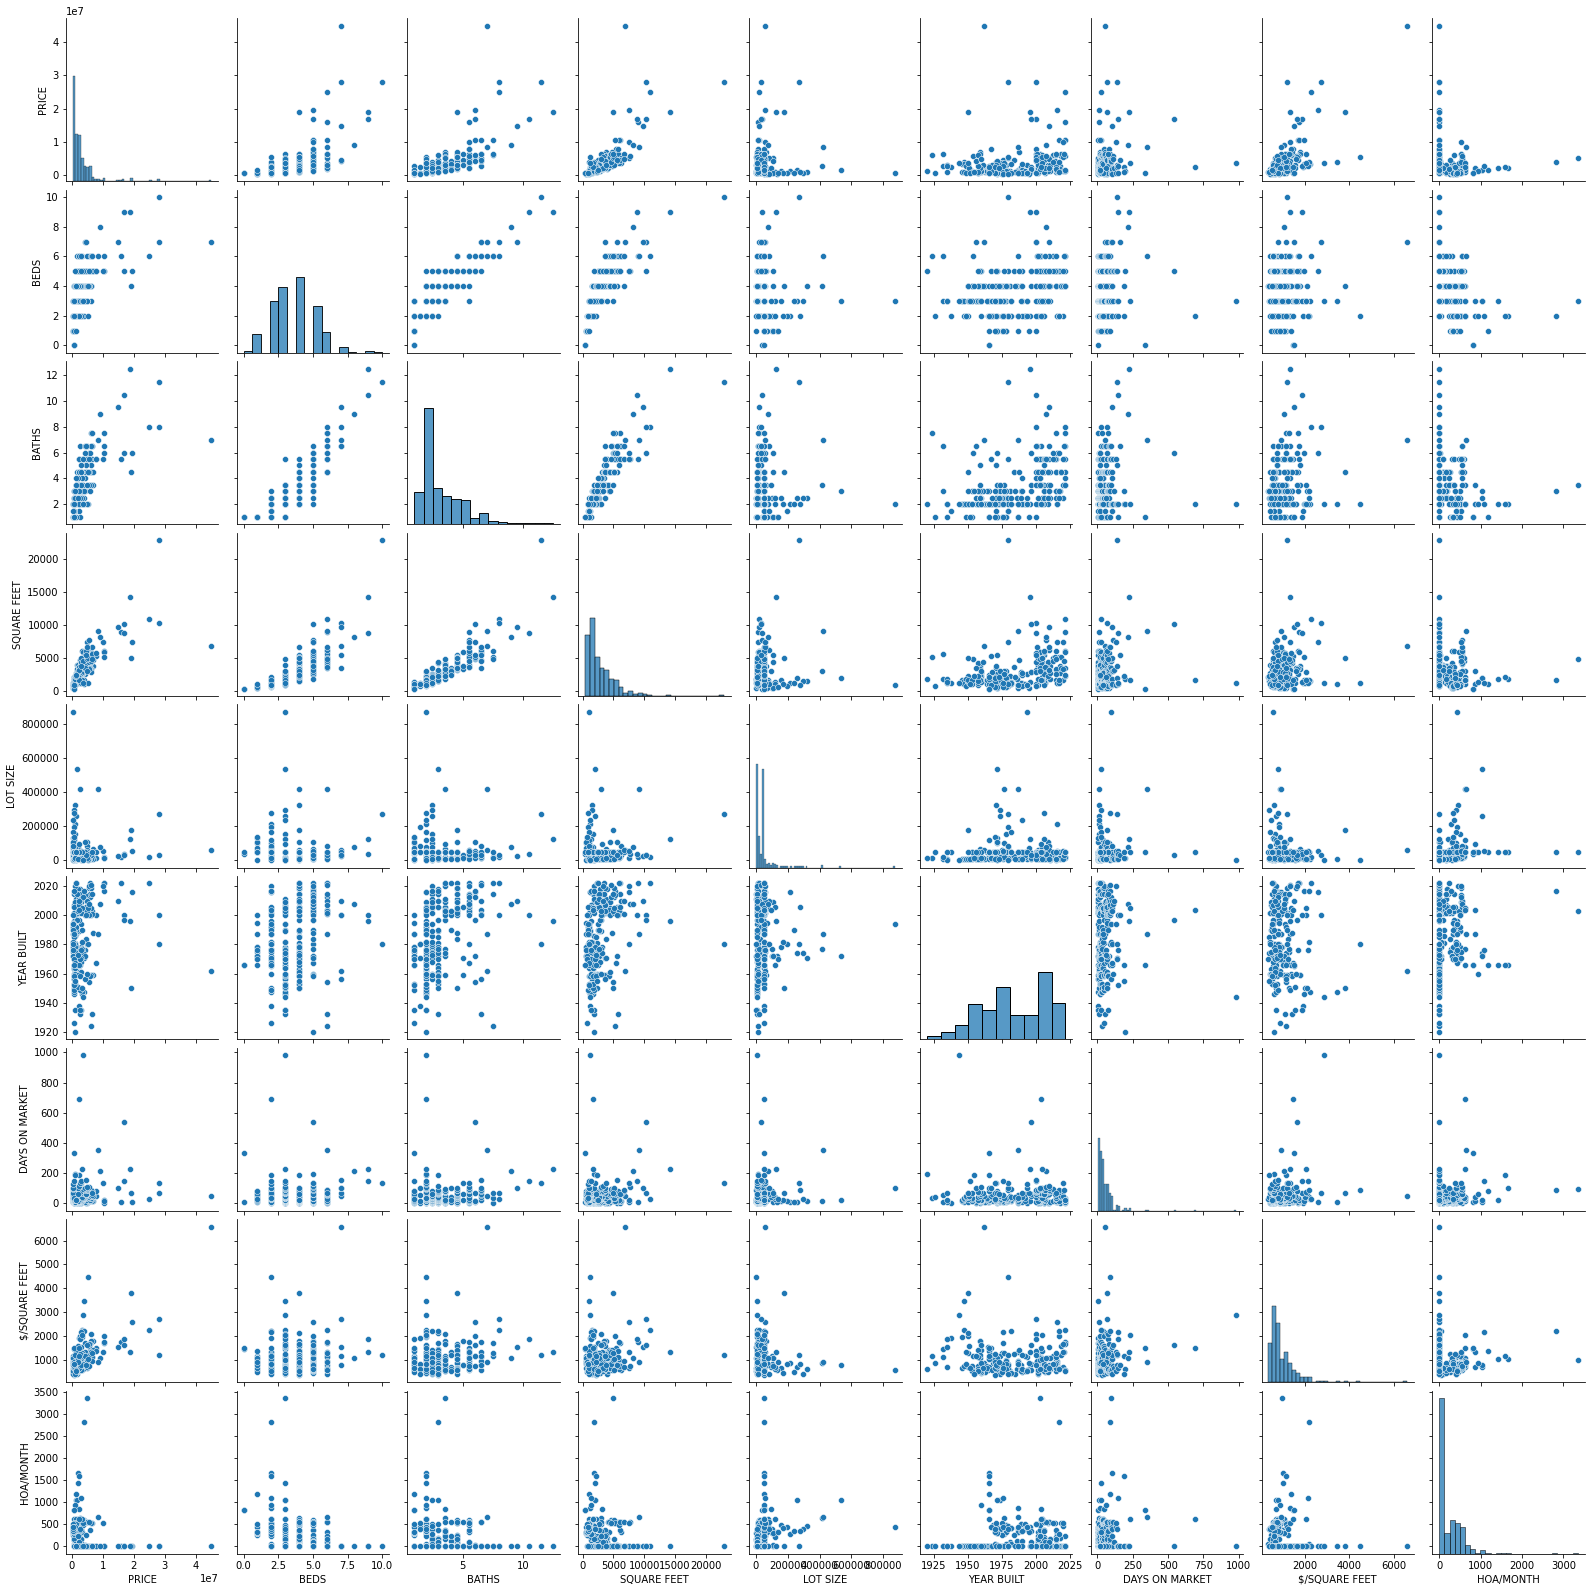

In [215]:
sns.pairplot(df_mod)

In [216]:
# Group the dataframe by the "Zip or Postal Code" and display the mean of each group
df_group_mean = df_mod.groupby(["ZIP OR POSTAL CODE"]).mean() # Verify this method

# Sort the groups by the "$/Square Feet" to rank least/most expensive neighborhoods
df_sort_mean = df_group_mean.sort_values(by=['$/SQUARE FEET'], ascending=False)
df_sort_mean

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
92037,4.958233e+06,3.653846,3.519231,3307.038462,48970.211834,1980.061538,69.923077,1390.723077,275.169231
92067,5.865633e+06,5.000000,5.833333,6387.333333,213008.000000,1989.333333,142.333333,928.666667,225.666667
92122,9.424750e+05,2.250000,1.750000,1103.625000,67209.814560,1984.250000,32.375000,861.625000,228.750000
92127,2.281949e+06,4.077922,3.616883,3224.987013,51066.287998,2003.000000,43.506494,674.974026,281.129870
91942,8.161404e+05,2.977273,2.090909,1456.136364,33906.637113,1963.431818,41.931818,578.613636,90.340909


In [217]:
# Group the dataframe by the "Zip or Postal Code" and display the std of each group
df_group_std = df_mod.groupby(["ZIP OR POSTAL CODE"]).std() # Verify this method
df_group_std


,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
91942,2.145983e+05,0.927328,0.622007,462.948869,53033.930640,18.405507,44.284176,116.278978,160.222511
92037,6.293927e+06,1.862363,2.303018,3031.672735,69945.852517,23.344987,118.616025,761.316801,504.177127
92067,2.229955e+06,1.000000,1.258306,2396.137378,179943.755871,18.610033,183.522024,174.046929,371.948025
92122,4.319988e+05,0.886405,0.462910,523.688822,86385.050368,12.991756,28.339460,45.453076,193.306382
92127,1.664889e+06,1.211418,1.325102,1734.767621,107469.968711,12.923866,33.854030,151.506121,189.813160


<AxesSubplot:xlabel='ZIP OR POSTAL CODE', ylabel='$/SQUARE FEET'>

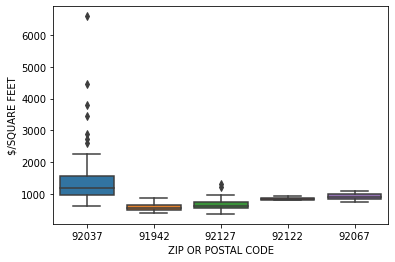

In [218]:
sns.boxplot(x='ZIP OR POSTAL CODE', y='$/SQUARE FEET', data=df_mod)

<AxesSubplot:xlabel='ZIP OR POSTAL CODE', ylabel='$/SQUARE FEET'>

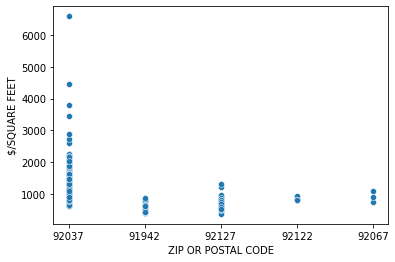

In [219]:
# Scatter Plot of "Zip or Postal Code" vs "$/Square Feet" to show the distribution of the data
sns.scatterplot(x='ZIP OR POSTAL CODE', y='$/SQUARE FEET', data=df_mod)


In [220]:
# Adjust Dataframe for Linear Regression Analysis
df_model = df_mod.drop(['STATE OR PROVINCE', 'LOCATION', 'SALE TYPE', 'CITY', 'PROPERTY TYPE', 'STATUS'], axis=1)
df_model = pd.get_dummies(df_model, columns=['ZIP OR POSTAL CODE'])
X=df_model.drop("$/SQUARE FEET", axis=1)
y=df_model["$/SQUARE FEET"]

In [221]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 295
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PRICE                     262 non-null    int64  
 1   BEDS                      262 non-null    float64
 2   BATHS                     262 non-null    float64
 3   SQUARE FEET               262 non-null    float64
 4   LOT SIZE                  262 non-null    float64
 5   YEAR BUILT                262 non-null    float64
 6   DAYS ON MARKET            262 non-null    float64
 7   $/SQUARE FEET             262 non-null    float64
 8   HOA/MONTH                 262 non-null    float64
 9   ZIP OR POSTAL CODE_91942  262 non-null    uint8  
 10  ZIP OR POSTAL CODE_92037  262 non-null    uint8  
 11  ZIP OR POSTAL CODE_92067  262 non-null    uint8  
 12  ZIP OR POSTAL CODE_92122  262 non-null    uint8  
 13  ZIP OR POSTAL CODE_92127  262 non-null    uint8  
dtypes: float64

In [222]:
# Import SKLearn Libraries
from sklearn.model_selection import train_test_split

In [223]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [224]:
# Set the Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [225]:
# Fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [226]:
# Score the model on the testing data
lm.score(X_test, y_test)

0.814477777671601

In [227]:
# Predict the values of the testing data
y_pred = lm.predict(X_test)

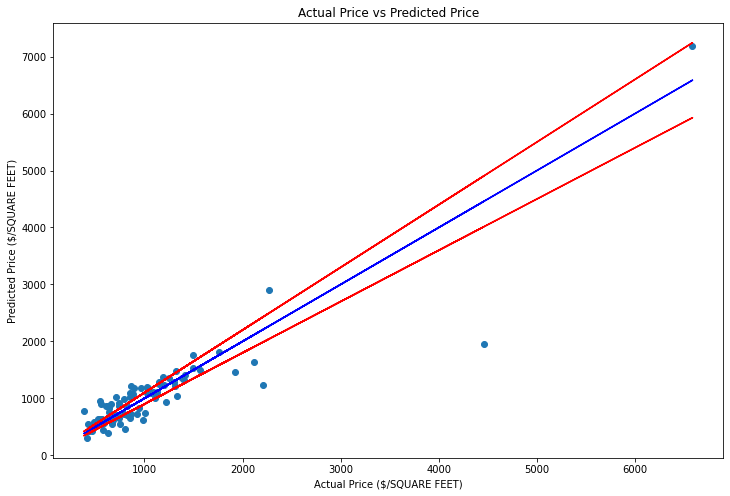

In [228]:
# Plot the predicted values vs the actual values
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price ($/SQUARE FEET)')
plt.ylabel('Predicted Price ($/SQUARE FEET)')
plt.title('Actual Price vs Predicted Price')
# plot the perfect prediction line
plt.plot(y_test, y_test, color='blue')
# plot the 10% error line
plt.plot(y_test, y_test*1.1, color='red')
# plot the -10% error line
plt.plot(y_test, y_test*0.9, color='red')

plt.show()


In [229]:
# STATSMODELS Linear Regression Model to show the p-values of each feature
from statsmodels.api import OLS
import statsmodels.api as sm
X = sm.add_constant(X)
lin_model_results = OLS(y, X).fit()
lin_model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          $/SQUARE FEET   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     84.89
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           9.53e-81
Time:                        02:25:45   Log-Likelihood:                -1858.2
No. Observations:                 262   AIC:                             3742.
Df Residuals:                     249   BIC:                             3789.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5632.5925   1774.859      3.174      0.002    2136.942    9128.243
PRICE                        0.0002    6.6e-06     23.229      0.000       0.000       0.000
BEDS                       -11.7581     27.581     -0.426      0.670     -66.079      42.563
BATHS                       29.2156     29.122      1.003      0.317     -28.142      86.573
SQUARE FEET                 -0.2031      0.020    -10.226      0.000      -0.242      -0.164
LOT SIZE                    -0.0007      0.000     -2.834      0.005      -0.001      -0.000
YEAR BUILT                  -2.9000      1.077     -2.692      0.008      -5.022      -0.778
DAYS ON MARKET               0.8170      0.212      3.857      0.000       0.400       1.234
HOA/MONTH                   -0.0034      0.056     -0.060      0.952      -0.114       0.107
ZIP OR POSTAL CODE_91942   772.9776    345.044      2.240      0.026      93.401    1452.554
ZIP OR POSTAL CODE_92037  1328.0432    351.846      3.775      0.000     635.070    2021.016
ZIP OR POSTAL CODE_92067  1376.8015    380.791      3.616      0.000     626.820    2126.783
ZIP OR POSTAL CODE_92122  1057.1172    373.205      2.833      0.005     322.076    1792.158
ZIP OR POSTAL CODE_92127  1097.6530    377.674      2.906      0.004     353.810    1841.496
==============================================================================
Omnibus:                      242.473   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8092.494
Skew:                           3.533   Prob(JB):                         0.00
Kurtosis:                      29.294   Cond. No.                     6.26e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [230]:
# Import Libraries for Analysis of MAE and MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [231]:
# Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lm, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
ma_scores = mean(absolute(scores))
ma_scores
print('MAE: %.3f (%.3f)' % (mean(absolute(scores)), np.std(scores))) # Using MAE as the scoring metric
print('MAE: %.3f' % (ma_scores)) # Using MAE with mean
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred))) # Using MAE with test vs predicted
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred))) # Using MSE with test vs predicted

mse = mean_squared_error(y_pred, y_test) # Using MSE with predicted vs test
rmse = np.sqrt(mse)  
print('Linear Regression RMSE: %.4f' % rmse) 
mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % mae)

MAE: 186.950 (46.939)
MAE: 186.950
MAE: 190.420
MSE: 123929.043
Linear Regression RMSE: 352.0356
Linear Regression MAE: 190.4199


In [232]:
# Test the model with a house from the dataset
# Choose between 0 and 261 (261 is the last row in the dataset)
house_Index = 111 # <----- Change this value to test a different house 
house = df_model.iloc[house_Index] 

# Predict the price of the house
predict = (lm.predict([house.drop('$/SQUARE FEET')])).round(2) # Predict the price of the house
print("Predicted Price", predict[0], "($/SQUARE FEET)") # Display the predicted price of the house
print("Actual Price:", house["$/SQUARE FEET"], "($/SQUARE FEET)") # Display the price of the house

# Display the difference between the predicted and actual price of the house
difference = (predict[0] - house["$/SQUARE FEET"]).round(2)
print("Difference:", difference, "($/SQUARE FEET)") 

# Display the percent difference between the predicted and actual price of the house
percent = ((difference / house["$/SQUARE FEET"]) * 100).round(2)
print("Percent Difference:", percent, "(%)") 

# Display the percent error between the predicted and actual price of the house
error = ((predict[0] - house["$/SQUARE FEET"])/predict[0]*100).round(2)
print("Percent Error:", error, "(%)") 

# Additional Information about the house
house

Predicted Price 683.11 ($/SQUARE FEET)
Actual Price: 686.0 ($/SQUARE FEET)
Difference: -2.89 ($/SQUARE FEET)
Percent Difference: -0.42 (%)
Percent Error: -0.42 (%)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PRICE                       1925000.0
BEDS                              4.0
BATHS                             3.0
SQUARE FEET                    2806.0
LOT SIZE                       6199.0
YEAR BUILT                     2018.0
DAYS ON MARKET                   32.0
$/SQUARE FEET                   686.0
HOA/MONTH                       185.0
ZIP OR POSTAL CODE_91942          0.0
ZIP OR POSTAL CODE_92037          0.0
ZIP OR POSTAL CODE_92067          0.0
ZIP OR POSTAL CODE_92122          0.0
ZIP OR POSTAL CODE_92127          1.0
Name: 124, dtype: float64